In [91]:
pip install --upgrade scikit-learn

  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
ERROR: p-astro 0.8.2 has requirement scikit-learn==0.22.2.post1, but you'll have scikit-learn 0.24.2 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: '/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/threadpoolctl.py'

Note: you may need to restart the kernel to use updated packages.


In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from mpl_toolkits import mplot3d
import matplotlib

from numpy import math
import seaborn as sns; sns.set()
from pandas import DataFrame
import pandas as pd

import numpy.random as rnd

import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import max_error
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from random import randint
from numpy import pi
from random import random
import numpy.polynomial.polynomial as poly
import Harmonic_functions_and_waveform as hf
import joblib
from joblib import dump, load

from sklearn.linear_model import LinearRegression

from IPython.display import Audio
sound_file = './gameboy_sound.wav'

In [22]:
# source /cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/bin/activate igwn-py38

In [93]:
model = joblib.load('final_model.sav')

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Data import

In [24]:
data = pd.read_csv("Data3000_backup.csv",sep=',')
data2 = pd.read_csv("Data3000_backup_V3.csv",sep=',')
datatrain = pd.read_csv("FinalTrain_V3.csv",sep=',')

data1 = pd.read_csv("RealData_1.0.csv",sep=',')

In [12]:
X_precess = datatrain.drop('theta', axis=1)
X_precess = X_precess.drop('phase', axis=1)

X_precess.head(30)

,snr m=0,snr m=1,snr m=2,snr m=-1,snr m=-2,SNRphase0,SNRphase1,SNRphase2,SNRphase_1,SNRphase_2,sigma,square root,mean
0,1.077859,2.158340,3.150890,0.482955,2.189612,-0.700792,-1.957231,2.209189,0.167218,-1.535671,3.355631,4.558066,1.811931
1,0.901068,1.321039,1.776032,1.151370,0.459095,-2.207502,1.743614,-0.461557,2.223260,1.873133,0.000000,2.692169,1.121721
2,1.608284,1.088998,1.414864,1.591300,1.311097,-3.095484,-1.349387,2.478602,1.579470,0.635102,0.000000,3.166314,1.402909
3,0.471633,1.136055,1.267334,0.202797,1.007591,-2.167510,0.925547,-0.533943,1.609561,-0.031088,0.000000,2.043419,0.817082
4,0.669307,1.815587,2.072244,1.040778,2.456868,0.481812,-2.932673,1.742826,1.203752,-1.484834,0.000000,3.893320,1.610957
5,1.744527,0.156003,0.974217,1.921600,1.240498,-1.261037,-0.464268,-0.581714,2.160306,-1.928588,0.000000,3.041084,1.207369
6,1.657460,1.001080,0.637499,0.555983,0.934308,-1.839193,-0.067782,1.689175,2.654868,0.915779,0.000000,2.310365,0.957266
7,0.880842,2.130252,1.263695,1.626999,0.319490,-1.876366,2.511503,0.002010,-0.321560,1.153332,0.000000,3.108051,1.244255
8,0.512451,1.120764,1.243572,0.956111,1.422749,0.973702,2.376094,1.935577,2.965216,-1.275201,0.000000,2.450215,1.051130
9,0.740859,1.960153,2.160699,1.900984,1.649336,-2.284047,-1.176299,1.441680,2.105409,-0.920331,0.000000,3.923486,1.682406


## Predict Sigma Function

In [25]:
def sigma_predict(data, layer1, layer2):
    
    X_precess = data.drop('sigma', axis=1)
    X_precess = X_precess.drop('theta', axis=1)
    X_precess = X_precess.drop('phase', axis=1)
    y_precess = data['sigma']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_precess, y_precess,
                                                random_state=47, train_size = 0.8)
    sqroot = Xtest['square root']
    mean   = Xtest['mean']
    
    Xtrain = Xtrain.drop('square root', axis=1)
    Xtrain = Xtrain.drop('mean', axis=1)
    
    Xtest  = Xtest.drop('square root', axis=1)
    Xtest  = Xtest.drop('mean', axis=1)
    
    model  = MLPRegressor(hidden_layer_sizes = (layer1, layer2), max_iter=2000, learning_rate_init = 0.01, warm_start=False)
    
    model.fit(Xtrain, ytrain)      
    y_model = model.predict(Xtest)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_model))
    print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))
    
    #plt.plot(model.loss_curve_)
    
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    plt.figure(figsize=(15,10))
    plt.scatter(ytest, y_model, c = 'black')
    plt.plot(ytest, ytest, c = 'yellow', label = 'Actual vs actual', linewidth = 3)
    #plt.scatter(ytest, mean, c = 'blue')
    #plt.scatter(ytest, sqroot, c = 'orange')
    plt.xlabel('Actual', size=25)
    plt.ylabel('Predicted', size=25)
    plt.title('Predicting Sigma', size = 25)
    
    #plt.plot(np.linspace(0.7,11,10), np.linspace(0,11.8,10), linewidth = 3)
    
    #x = ytest
    #y = y_model
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'magenta', label = 'Line of best fit for predicted sigma', linewidth = 3)
    
    #x = ytest
    #y = sqroot
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b,c = 'red', label = 'Line of best fit for quadrature sum (L2 norm)', linewidth = 3)
    
    #x = ytest
    #y = mean
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'green', label = 'Line of best fit for mean of SNRs', linewidth = 3)
    
    plt.legend(fontsize = 22)
    
    return model, ytest, y_model

Mean Absolute Error: 0.009737624132358734
Mean Squared Error: 0.002614011325358271
Root Mean Squared Error: 0.051127402881021355


0.9972217806569335

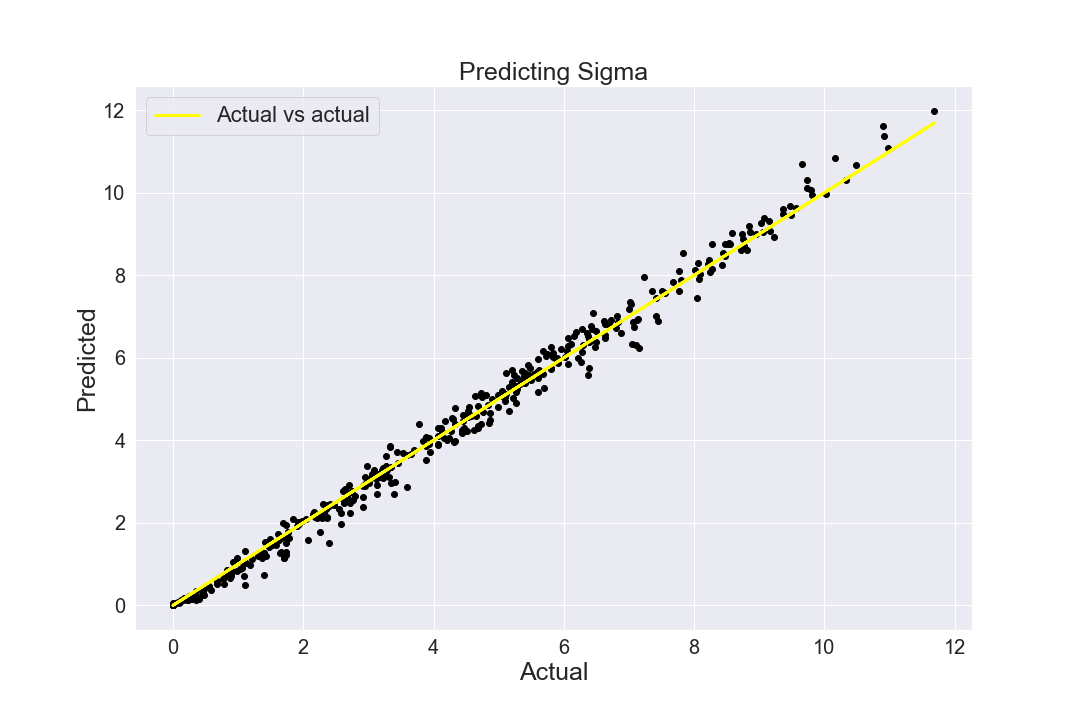

In [28]:
model_V600, ytestV600, ymodelV600 = sigma_predict(datatrain, 600, 100)

from sklearn.metrics import r2_score

r2 = r2_score(ytestV600, ymodelV600, sample_weight=None)
r2

Mean Absolute Error: 1.183042443890251
Mean Squared Error: 2.448859645384396
Root Mean Squared Error: 1.5648832689323495


0.7030461727448247

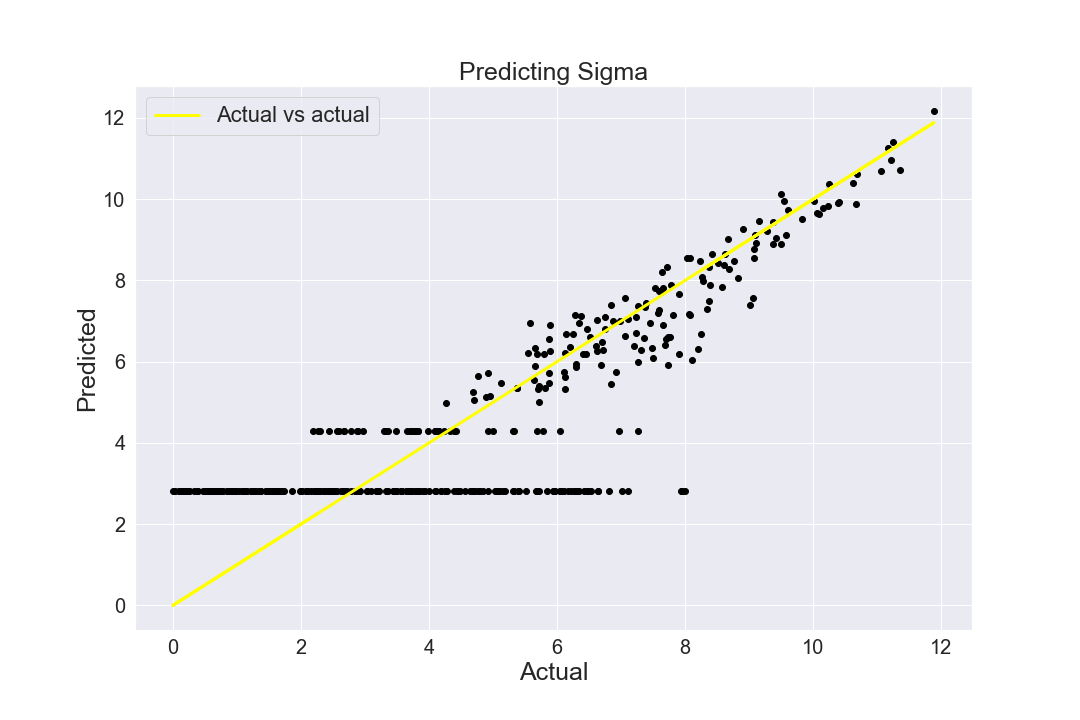

In [19]:
modelV1, ytestV1, ymodelV1 = sigma_predict(data2, 50,20)

from sklearn.metrics import r2_score

r2 = r2_score(ytestV1, ymodelV1, sample_weight=None)
r2

Mean Absolute Error: 0.03591900870466991
Mean Squared Error: 0.030071660341288536
Root Mean Squared Error: 0.1734118229570537


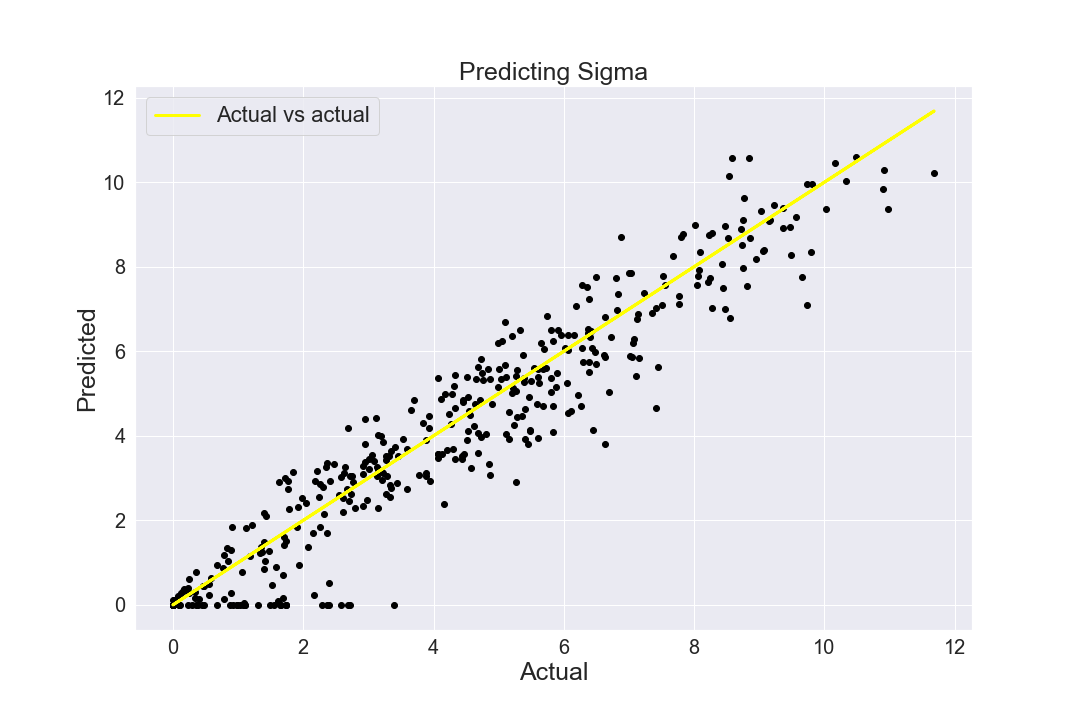

In [8]:
modelV300, ytestV300, ymodelV300 = sigma_predict(datatrain, 2,4)

Mean Absolute Error: 0.008872127520354493
Mean Squared Error: 0.0026460178695922004
Root Mean Squared Error: 0.05143945829411698


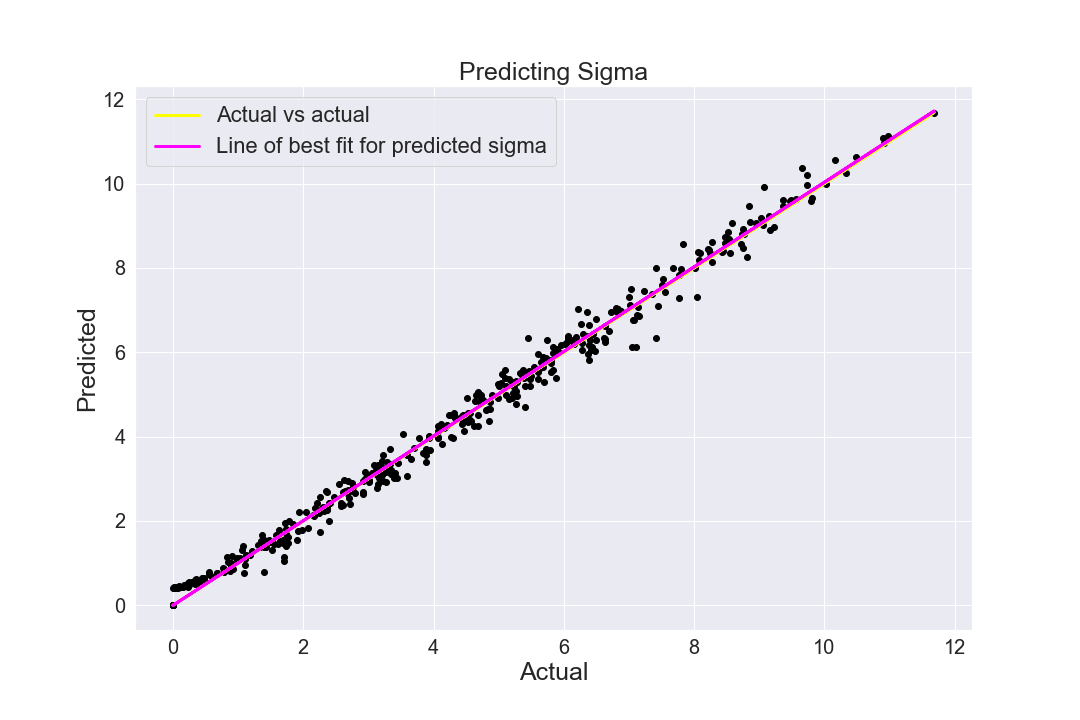

In [20]:
modelV1, ytestV1, ymodelV1 = sigma_predict(datatrain, 600, 96)

Mean Absolute Error: 0.008779073237290866
Mean Squared Error: 0.0027894166492935185
Root Mean Squared Error: 0.052814928280681385


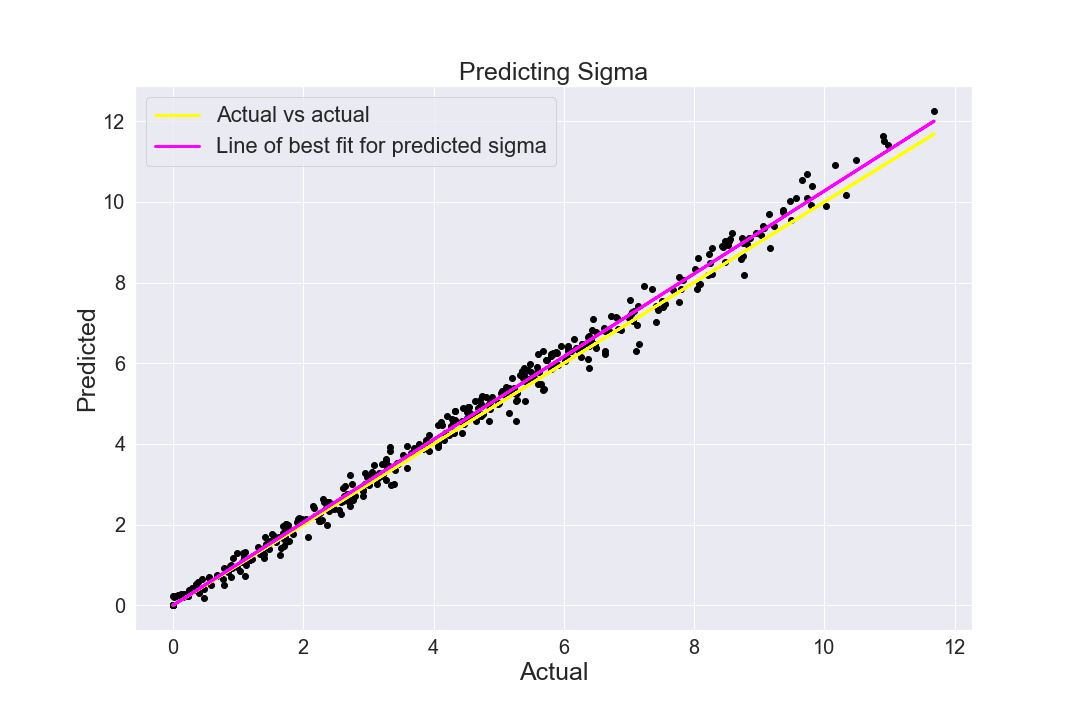

In [4]:
modelV1, ytestV1, ymodelV1 = sigma_predict(datatrain, 600, 300)

(5634.5, 5834.5)

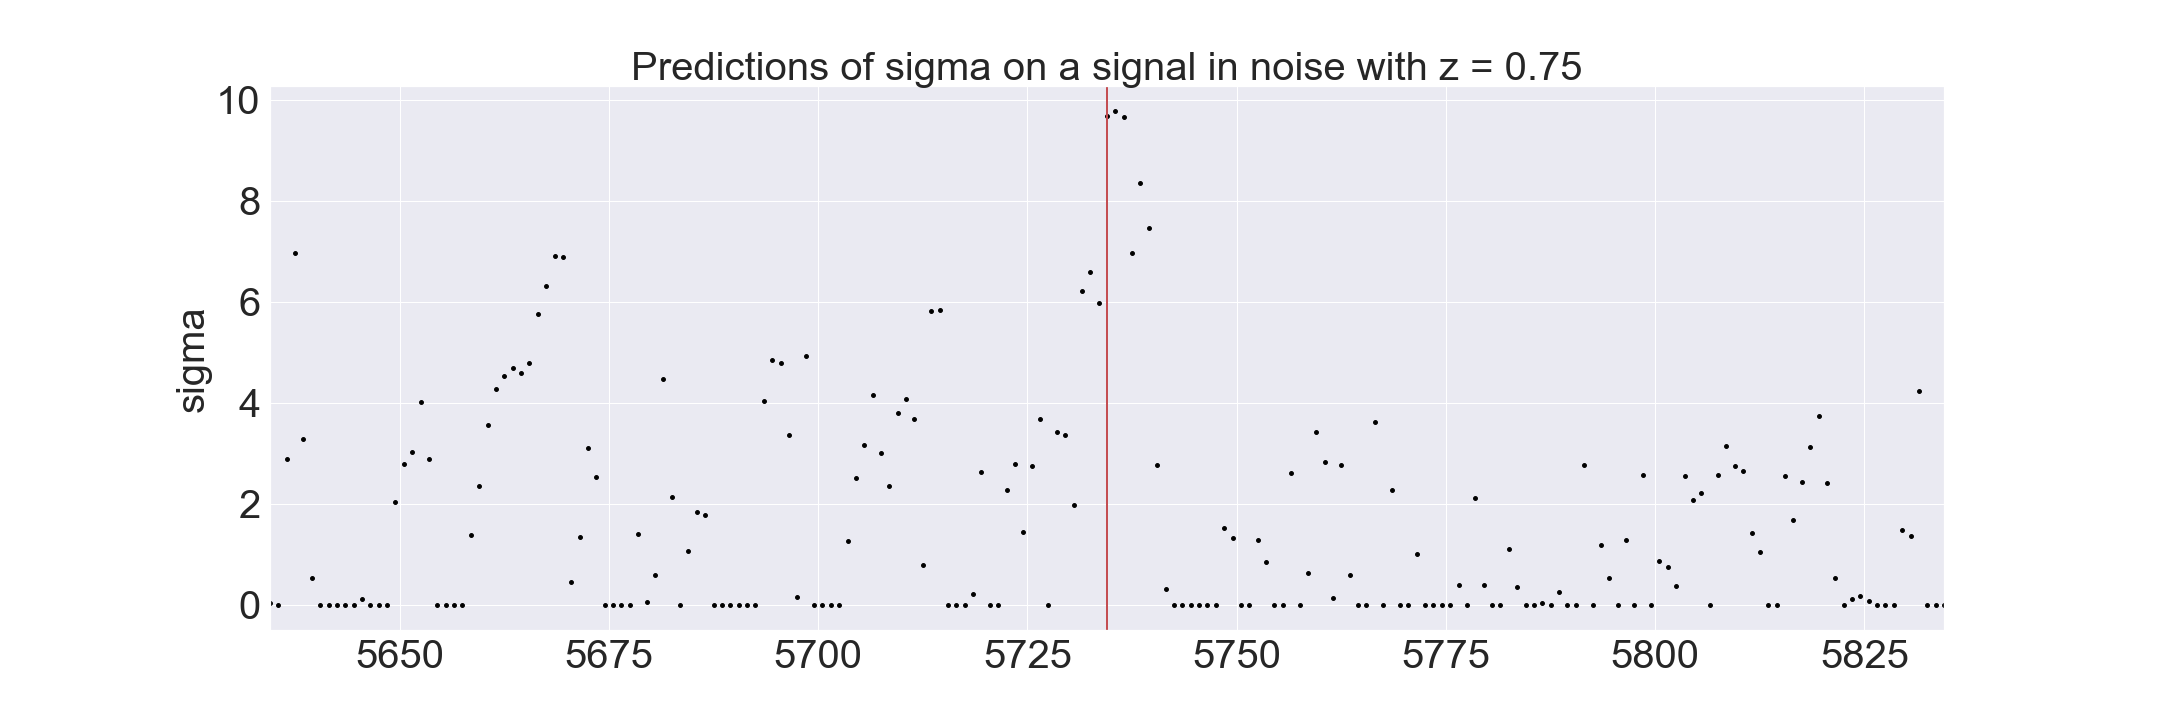

In [16]:
predic_signalV4 = model.predict(data1)

#plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4, s = 15, c = 'black')

plt.ylabel('sigma', fontsize = 40)
plt.title('Predictions of sigma on a signal in noise with z = 0.75', fontsize = 40)
plt.axvline(x=len(predic_signalV4)/2, color='r', linestyle='-', linewidth = 2)

plt.xlim(len(predic_signalV4)/2-100,len(predic_signalV4)/2+100)

## 3000 examples all with z = 1.

In [118]:
sig_vals = []

for i in range(3000):
    
    
    filename = "Data_noiseV%s.csv" %i

    data = pd.read_csv(filename,sep=',')
    
    sigma = data['sigma'][0]
    
    sig_vals.append(sigma)

In [119]:
x = np.loadtxt("predictions_in_noise_last3000.txt")
predictions = np.array(x)

In [120]:
len(predictions)

3000

Text(0.5, 1.0, 'Comparison of predicted sigma values in real data')

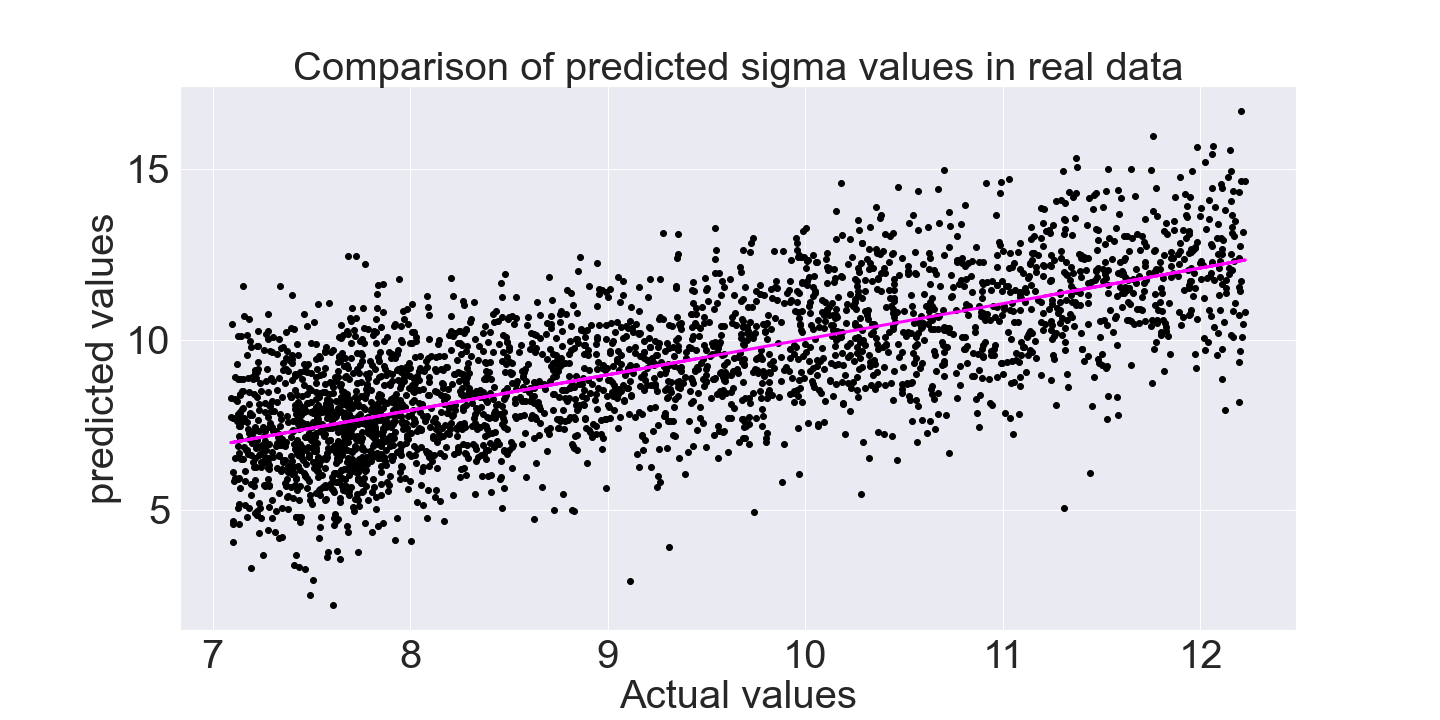

In [121]:
plt.figure(figsize=(20,10))

plt.scatter(sig_vals, predictions, c = 'black')

matplotlib.rc('xtick', labelsize=35)
matplotlib.rc('ytick', labelsize=35)

x = sig_vals
x = np.array(x)
y = predictions
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = 'magenta', label = 'Line of best fit for predicted sigma', linewidth = 3)

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.xlabel('Actual values', fontsize = 40)
plt.ylabel('predicted values', fontsize = 40)
plt.title('Comparison of predicted sigma values in real data', fontsize = 40)

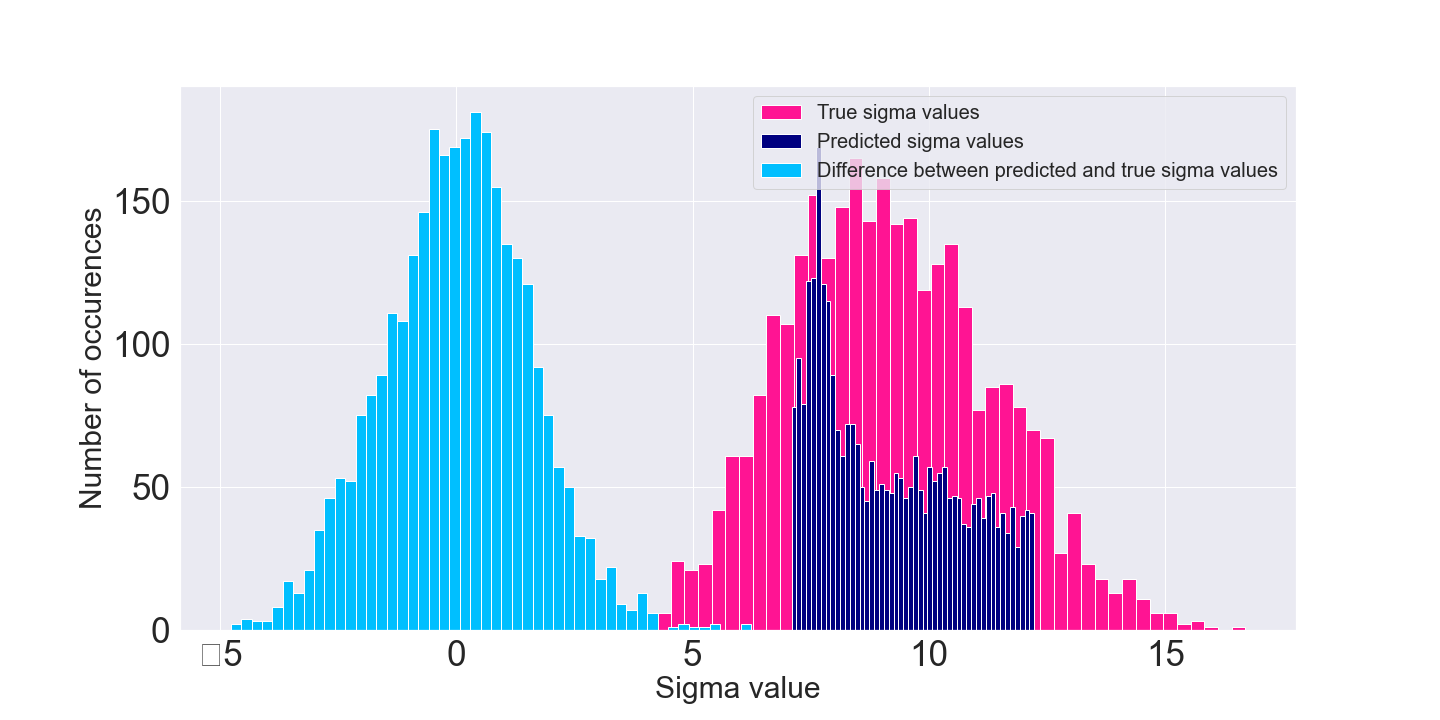

In [128]:
plt.figure(figsize=(20,10))

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

plt.hist(y, bins = 50, color = 'deeppink', label = 'True sigma values');
plt.hist(x, bins = 50, color = 'navy', label = 'Predicted sigma values');
plt.hist(x-y, bins = 50, color = 'deepskyblue', label = 'Difference between predicted and true sigma values');

plt.ylabel('Number of occurences', fontsize = 30)

plt.xlabel('Sigma value', fontsize = 30)

plt.legend(fontsize = 20)

In [123]:
z = x-y

In [124]:
len(z) - len(z[z>0.1]) - len(z[z<-0.1])

153

In [125]:
((len(z) - len(z[z>0.1]) - len(z[z<-0.1]))/len(z))*100

5.1

In [126]:
len(z) - len(z[z>1]) - len(z[z<-1])

1486

In [127]:
((len(z) - len(z[z>1]) - len(z[z<-1]))/len(z))*100

49.53333333333333

In [129]:
sig_vals = []

for i in range(5000):
    
    
    filename = "Data_noiseV%s.csv" %i

    data = pd.read_csv(filename,sep=',')
    
    sigma = data['sigma'][0]
    
    sig_vals.append(sigma)
    
    np.savetxt("sigmas_5000.txt", sig_vals)

Text(0.5, 1.0, 'Comparison of predicted sigma values in real data')

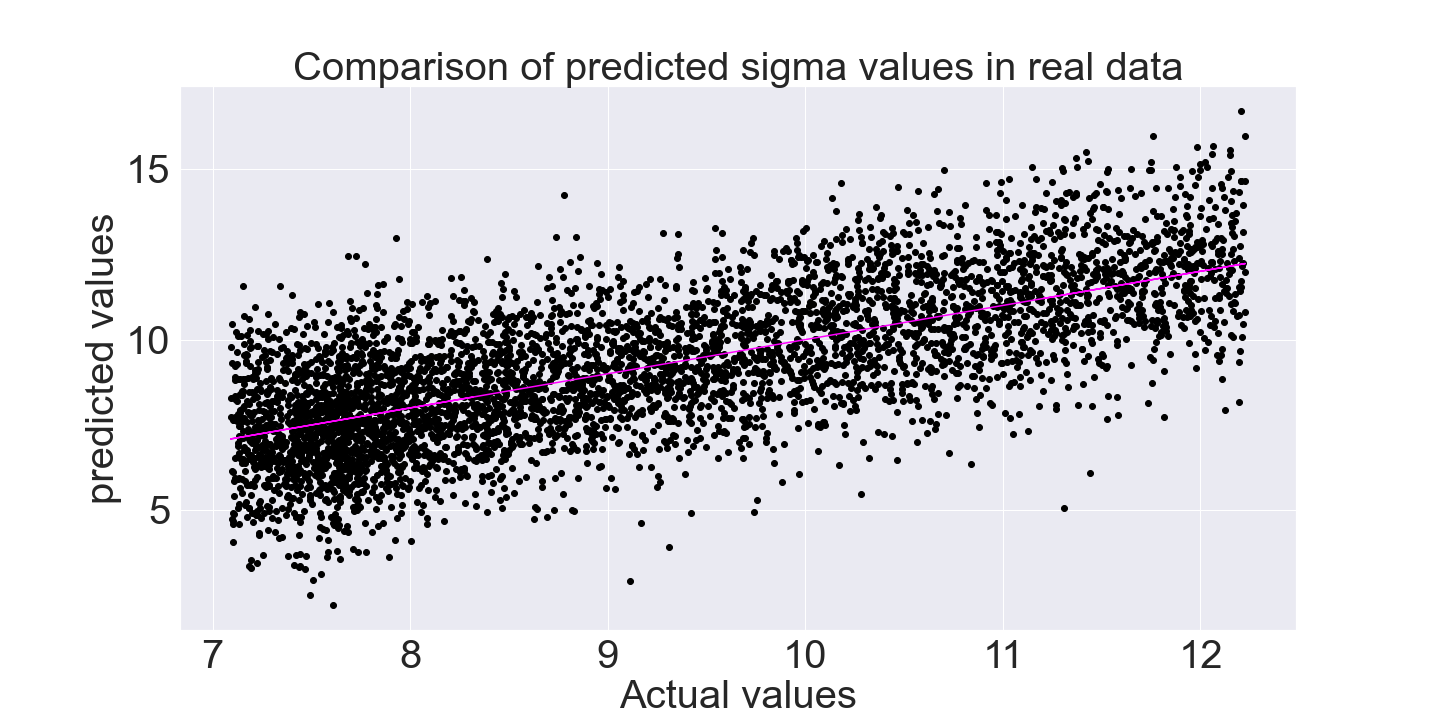

In [133]:
x = np.loadtxt("predictions_in_noise_last5000.txt")
predictions = np.array(x)

y = np.loadtxt("sigmas_5000.txt")
sigma = np.array(y)

plt.figure(figsize=(20,10))

plt.scatter(sigma, predictions, c = 'black')

plt.plot(sigma,sigma, c = 'magenta')

matplotlib.rc('xtick', labelsize=35)
matplotlib.rc('ytick', labelsize=35)



matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.xlabel('Actual values', fontsize = 40)
plt.ylabel('predicted values', fontsize = 40)
plt.title('Comparison of predicted sigma values in real data', fontsize = 40)

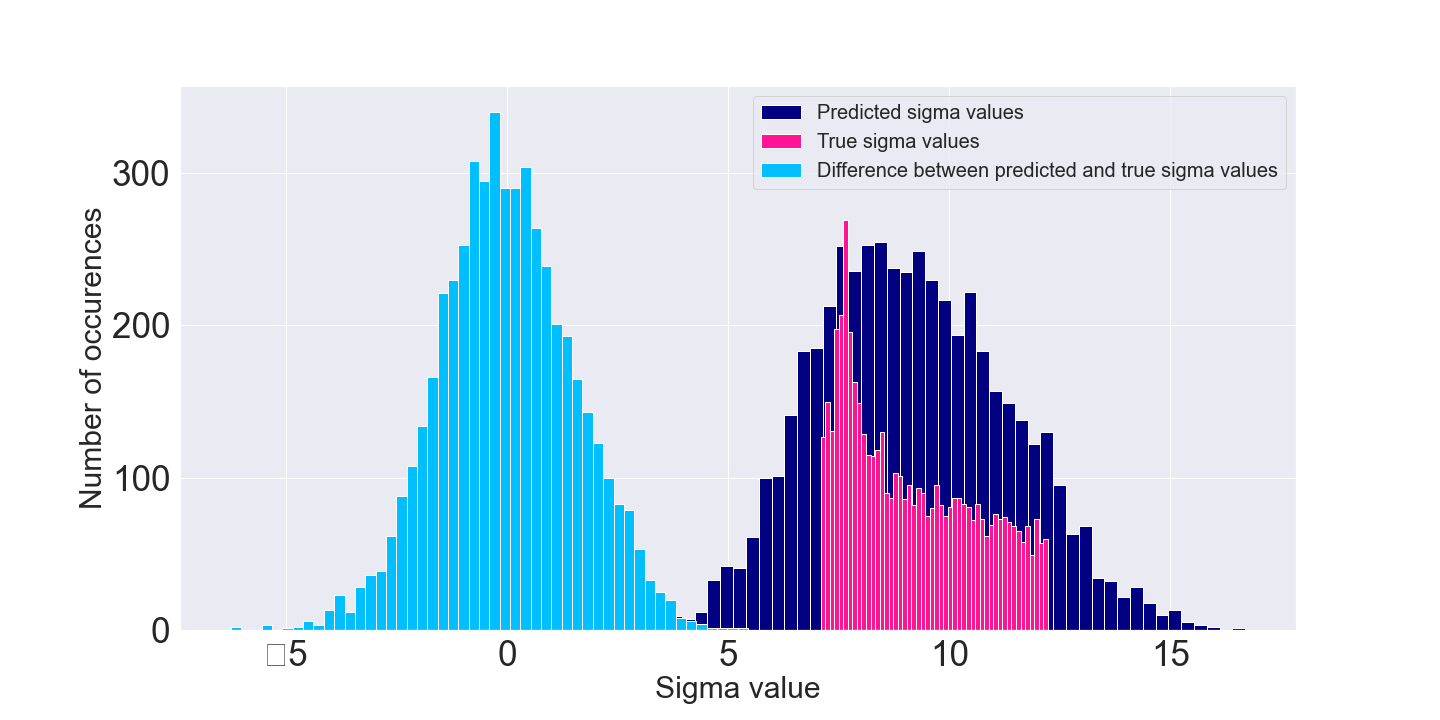

In [135]:
plt.figure(figsize=(20,10))

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

plt.hist(x, bins = 50, color = 'navy', label = 'Predicted sigma values');
plt.hist(y, bins = 50, color = 'deeppink', label = 'True sigma values');
plt.hist(x-y, bins = 50, color = 'deepskyblue', label = 'Difference between predicted and true sigma values');

plt.ylabel('Number of occurences', fontsize = 30)

plt.xlabel('Sigma value', fontsize = 30)

plt.legend(fontsize = 20)

In [107]:
predictions = []

for i in range(100):
    
    
    filename = "Data_V%s.csv" %i

    data = pd.read_csv(filename,sep=',')
    
    predic = model.predict(data)
    
    predic_centre = predic[1628:1648]
    
    predic_max = np.max(predic_centre)
    
    predictions.append(predic_max)

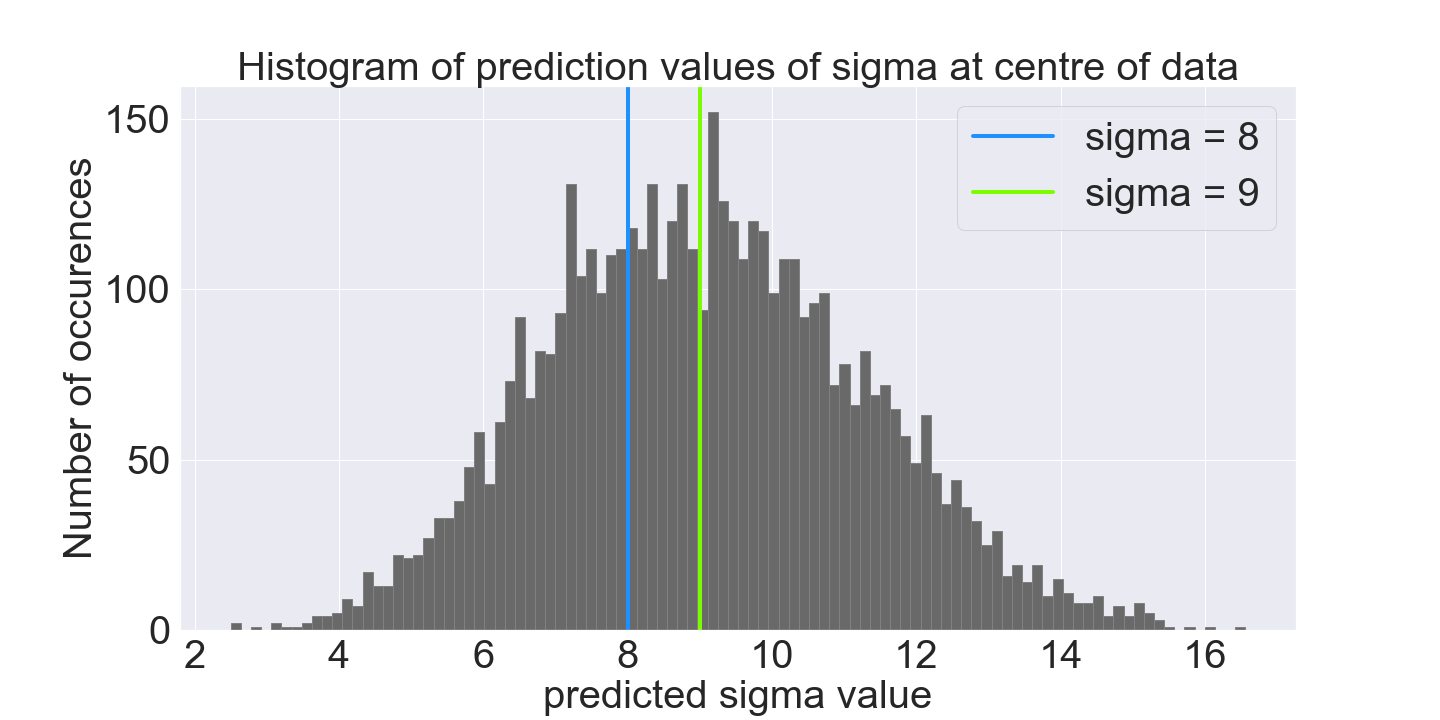

In [14]:
x = np.loadtxt("max_predictions3.txt")
y = np.array(x)

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.figure(figsize=(20,10))
plt.hist(y,bins = 100, color = "dimgray", ec="grey");

plt.title('Histogram of prediction values of sigma at centre of data', fontsize = 40)
plt.xlabel('predicted sigma value', fontsize = 40)
plt.ylabel('Number of occurences', fontsize = 40)
plt.axvline(x=8, color='dodgerblue', linestyle='-', linewidth = 4, label = 'sigma = 8')
plt.axvline(x=9, color='lawngreen', linestyle='-', linewidth = 4, label = 'sigma = 9')

plt.legend(fontsize = 40)

In [16]:
len(y[y>8]), len(y[y>9])

(3337, 2508)

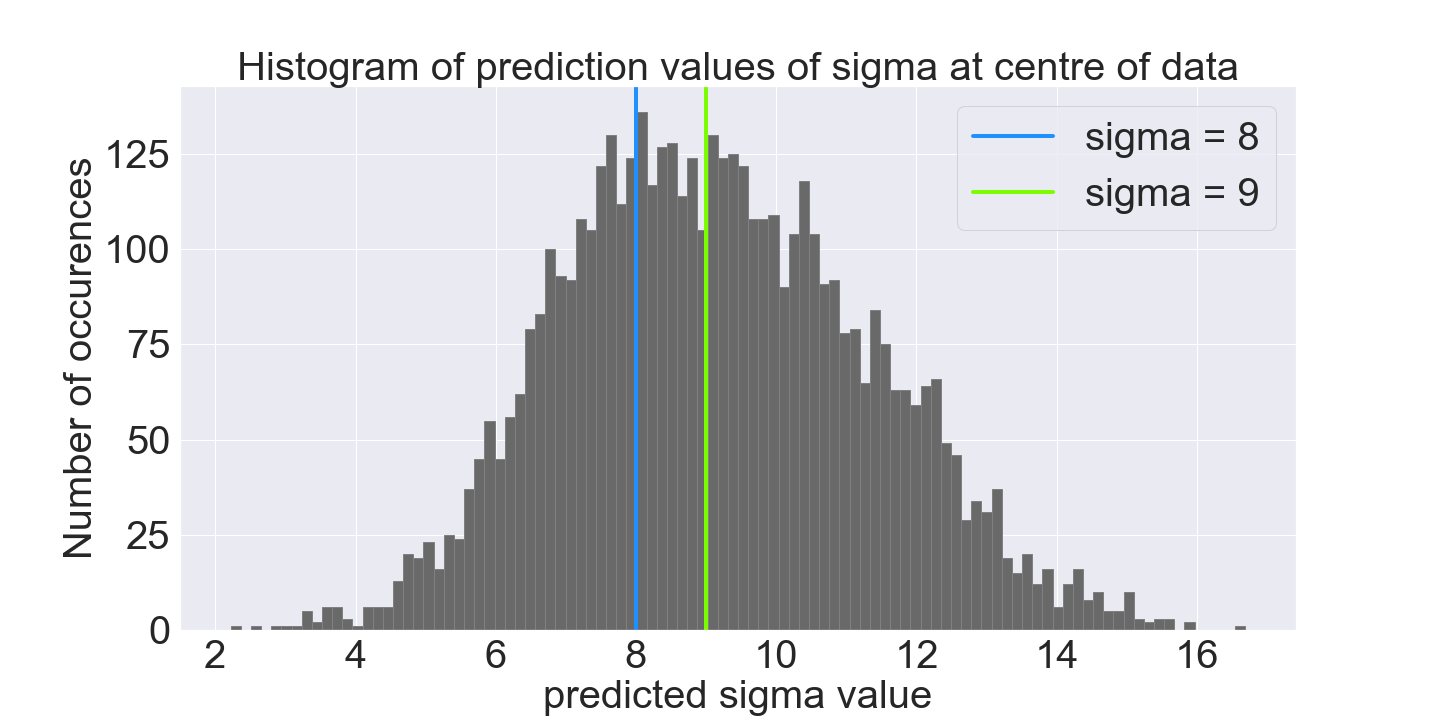

In [137]:
x = np.loadtxt("predictions_in_noise_last5000.txt")
y = np.array(x)

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.figure(figsize=(20,10))
plt.hist(y,bins = 100, color = "dimgray", ec="grey");

plt.title('Histogram of prediction values of sigma at centre of data', fontsize = 40)
plt.xlabel('predicted sigma value', fontsize = 40)
plt.ylabel('Number of occurences', fontsize = 40)
plt.axvline(x=8, color='dodgerblue', linestyle='-', linewidth = 4, label = 'sigma = 8')
plt.axvline(x=9, color='lawngreen', linestyle='-', linewidth = 4, label = 'sigma = 9')

plt.legend(fontsize = 40)